In [39]:
import numpy as np
la =np.linalg
corpus= "the quick brown fox jumped over the quick moon and he was happy with that."
#corpus= "i like deep learning i like nlp i enjoy flying."
class concurrenceMatrix(object):
    """docstring for concurrenceMatrix."""
    def __init__(self):
        super(concurrenceMatrix, self).__init__()

    def breakintoWords(self, corpus):
        res = []
        temp = corpus.split(" ")
        res = temp[:-1]
        temp1 = temp[-1].split(".")
        res.append(temp1[0])
        res.append(temp[-1][-1])
        return res

    def ngram(self, words, type):
        listofngrams = list(zip(*[words[i:] for i in range(type)]))
        return listofngrams

    def arrayed(self,words,uniquewords):
        #Form a N*N array , which represent bigrams only for now
        #initialize
        N = len(uniquewords)
        X = np.zeros(shape=(N,N))
        listofngrams = self.ngram(words, 2)
        mapwordtoindex = {}
        for i in range(0,len(uniquewords)):
            mapwordtoindex[uniquewords[i]] = i
        for idx, word in enumerate(uniquewords):
            for idx2,gram in enumerate(listofngrams):
                if word==gram[0]:
                    idxnew = mapwordtoindex[gram[1]]
                    X[idx][idxnew]+=1
                    X[idxnew][idx]=X[idx][idxnew]
        return X


In [40]:
obj = concurrenceMatrix()
words = obj.breakintoWords(corpus)
uniquewords = []
for word in words:
    if word not in uniquewords:
        uniquewords.append(word)
print(uniquewords)
X = np.asarray(obj.arrayed(words,uniquewords))
print(X)


['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'moon', 'and', 'he', 'was', 'happy', 'with', 'that', '.']
[[ 0.  2.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [41]:
U, S, Vh = la.svd(X, full_matrices=False)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
val = pca.fit_transform(U)

In [45]:
import matplotlib.pyplot as plt
plt.figure()
for i in range(len(uniquewords)):
    plt.text(val[i,0], val[i,1], uniquewords[i])

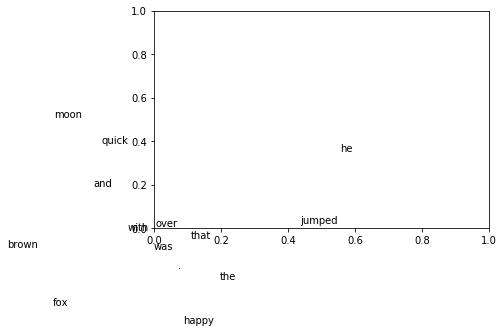

In [46]:
plt.show()